# Implement a Decision Tree classifier using post-pruning (ccp-alpha)

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')

In [2]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [3]:
X = df.drop('target', axis=1)
Y = df['target']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_simple = DecisionTreeClassifier(random_state=42)
dt_simple.fit(X_train, y_train)
y_pred_simple = dt_simple.predict(X_test)
print(accuracy_score(y_test, y_pred_simple))

0.7362637362637363


[]

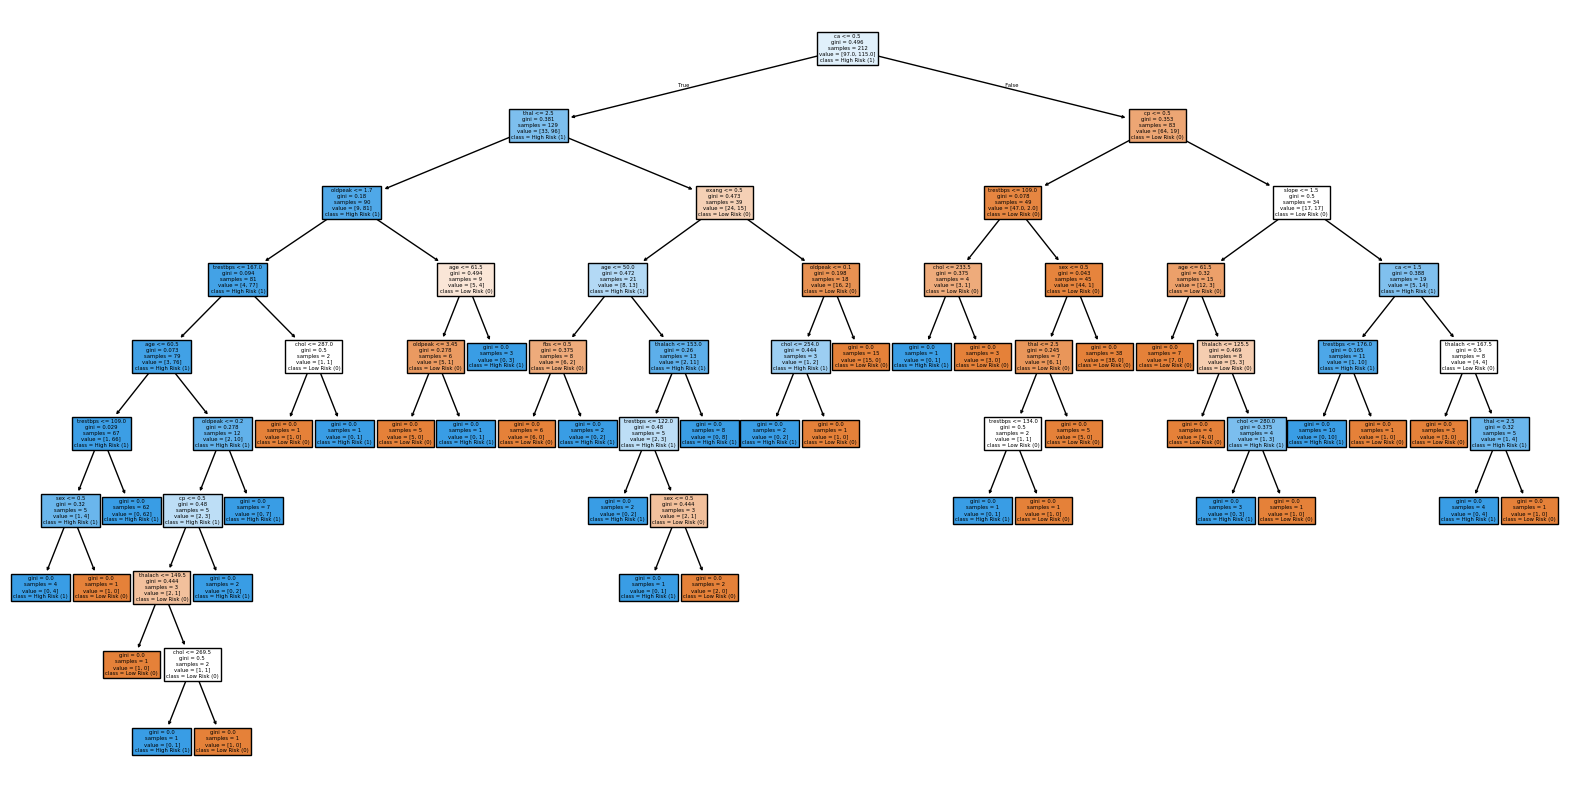

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt_simple,
    feature_names=X.columns.tolist(),
    class_names=['Low Risk (0)', 'High Risk (1)'],
    filled=True
)
plt.plot()

In [8]:
import numpy as np

path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = np.unique(path.ccp_alphas)
print(ccp_alphas)

[0.         0.00307477 0.00314465 0.00418756 0.00432261 0.00443674
 0.00532172 0.00628931 0.00707547 0.00754717 0.00778302 0.00786164
 0.00857633 0.0093166  0.01048218 0.01310273 0.01415094 0.01660446
 0.01957838 0.02279047 0.02359067 0.03992675 0.06818274 0.12650172]


In [13]:
for ccp_alpha in ccp_alphas:
  dt_pruned = DecisionTreeClassifier(
      ccp_alpha=ccp_alpha,
      random_state=42
      )
  dt_pruned.fit(X_train, y_train)
  y_pred_pruned = dt_pruned.predict(X_test)
  print("ccp_alpha:", ccp_alpha, "accuracy score:", accuracy_score(y_test, y_pred_pruned))

ccp_alpha: 0.0 accuracy score: 0.7362637362637363
ccp_alpha: 0.0030747728860936433 accuracy score: 0.7252747252747253
ccp_alpha: 0.003144654088050314 accuracy score: 0.7252747252747253
ccp_alpha: 0.004187564684340419 accuracy score: 0.7362637362637363
ccp_alpha: 0.004322609369978211 accuracy score: 0.7362637362637363
ccp_alpha: 0.0044367432507594175 accuracy score: 0.7252747252747253
ccp_alpha: 0.005321722302854378 accuracy score: 0.7362637362637363
ccp_alpha: 0.006289308176100628 accuracy score: 0.7362637362637363
ccp_alpha: 0.007075471698113208 accuracy score: 0.7362637362637363
ccp_alpha: 0.007547169811320753 accuracy score: 0.7362637362637363
ccp_alpha: 0.007783018867924526 accuracy score: 0.7472527472527473
ccp_alpha: 0.007861635220125786 accuracy score: 0.7582417582417582
ccp_alpha: 0.008576329331046312 accuracy score: 0.7582417582417582
ccp_alpha: 0.009316601968041885 accuracy score: 0.7802197802197802
ccp_alpha: 0.010482180293501047 accuracy score: 0.7802197802197802
ccp_alpha:

In [14]:
BEST_CCP_ALPHA = 0.019578383414861414
dt_best = DecisionTreeClassifier(ccp_alpha=BEST_CCP_ALPHA, random_state=42)
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.019578383414861414, random_state=42)

[]

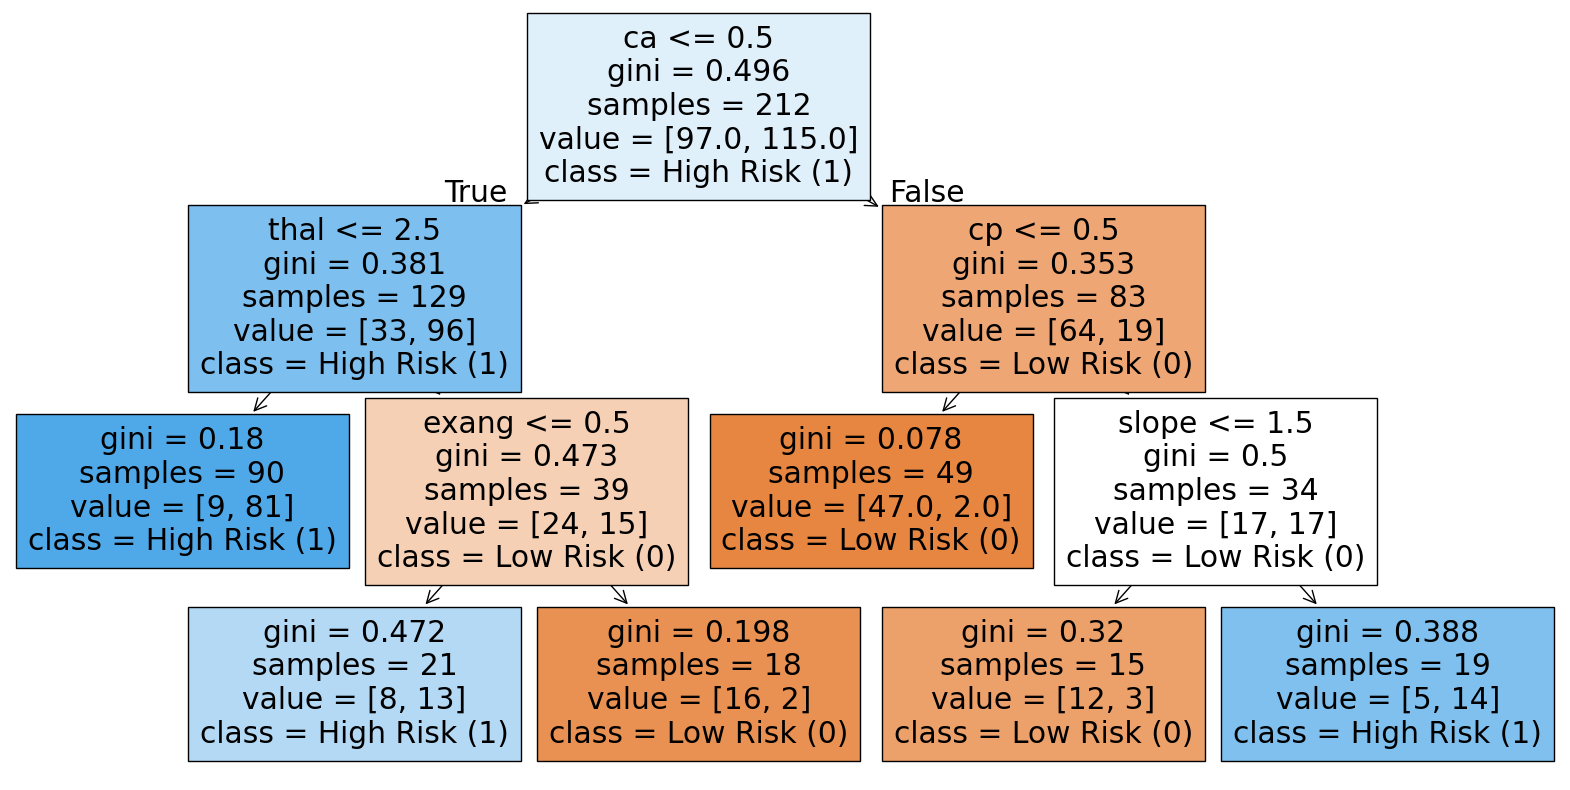

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_best,
    feature_names=X.columns.tolist(),
    class_names=['Low Risk (0)', 'High Risk (1)'],
    filled=True
)
plt.plot()